In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

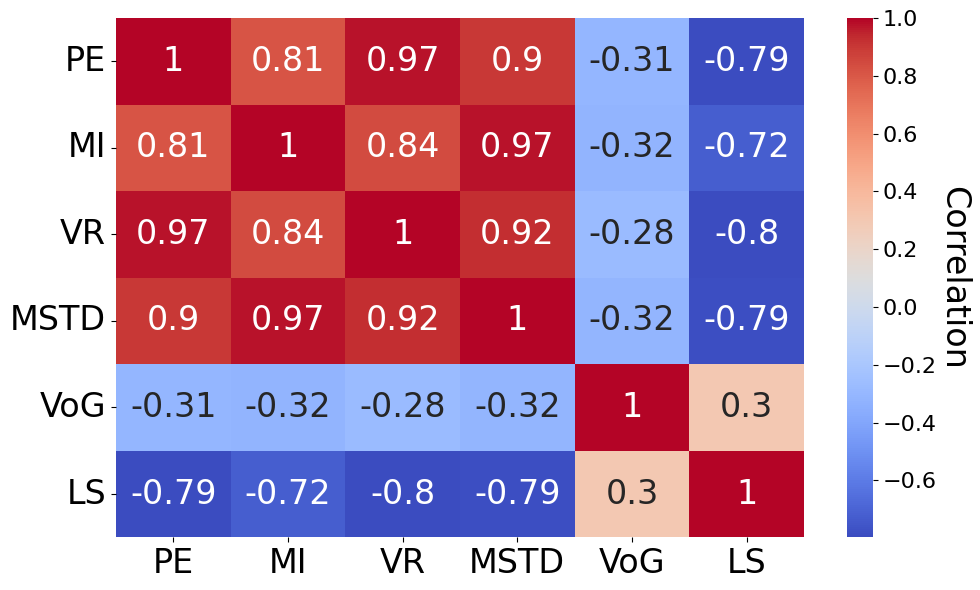

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your existing code
seeds = [69, 420, 80085]
training = True

for i, seed in enumerate(seeds):
    filename = f"../checkpoints/seed_{seed}_" + ['test', 'training'][int(training)] + "_metrics.pkl"
    df = pd.read_pickle(filename) if i == 0 else df + pd.read_pickle(filename)

df = df.drop(columns=["Predicted_Class_MC"])
df = df.drop(columns=["Variance_of_Gradients_Early"])
df = df.drop(columns=["Variance_of_Gradients_Late"])
df = df.rename(columns={"vog": "VoG"})
df = df.rename(columns={
    "Mean_Std_Deviation": "MSTD", 
    'Predictive_Entropy': 'PE', 
    'Mutual_Information': 'MI', 
    'Variation_Ratio': 'VR',
    'Learning_Speed': 'LS'    
})
df = df.rename(columns={col: col.replace("_", " ") for col in df.columns})

correlation_matrix = df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    cbar_kws={'label': 'Correlation', 'orientation' : 'vertical'}
)

# Customize the color bar
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Adjust tick label size
cbar.set_label('Correlation', size=32, labelpad=15)  # Adjust label size and padding
cbar.ax.xaxis.set_label_position('top')  # Set the label position to top
cbar.ax.xaxis.set_ticks_position('top')  # Move the ticks to the top
cbar.ax.set_ylabel('Correlation', rotation=270, size=24, labelpad=24) 
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels, align to the right
plt.yticks(rotation=0, va='center') 
plt.tick_params(axis='both', which='major', labelsize=24)  # Adjust tick label size
# increase font size within cells
for text in heatmap.texts:
    text.set_size(24)

# Display the plot
plt.tight_layout()
plt.show()

# sns.pairplot(df, plot_kws={"s": 8, "alpha":0.5});

Text(45.722222222222214, 0.5, 'Remove Easiest')

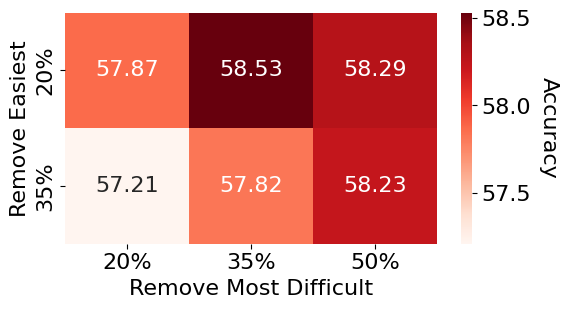

In [3]:
results = [[57.87, 58.53, 58.29], [57.21, 57.82, 58.23]]
df = pd.DataFrame(results)

plt.figure(figsize=(6, 3))
heatmap = sns.heatmap(
    df,
    annot=True,
    fmt='.2f',
    cmap='Reds',
    xticklabels=["20%", "35%", "50%"],
    yticklabels=["20%", "35%"], 
    cbar_kws={'label': 'Accuracy', 'orientation' : 'vertical'}
)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)  # Adjust tick label size
cbar.set_label('Accuracy', size=16, labelpad=15)  # Adjust label size and padding
cbar.ax.xaxis.set_label_position('top')  # Set the label position to top
cbar.ax.xaxis.set_ticks_position('top')  # Move the ticks to the top
cbar.ax.set_ylabel('Accuracy', rotation=270, size=16, labelpad=20) 
plt.tick_params(axis='both', which='major', labelsize=16) 

for text in heatmap.texts:
    text.set_size(16)

plt.xlabel("Remove Most Difficult", size=16)
plt.ylabel("Remove Easiest", size=16)

In [ ]:
# prerequisite: run the training loop for the seed {seed}
final_acc_train = np.load(f"../checkpoints/final_acc_seed_{seed}_train.npy")
final_acc_test = np.load(f"../checkpoints/final_acc_seed_{seed}_test.npy")
final_acc_test.mean()

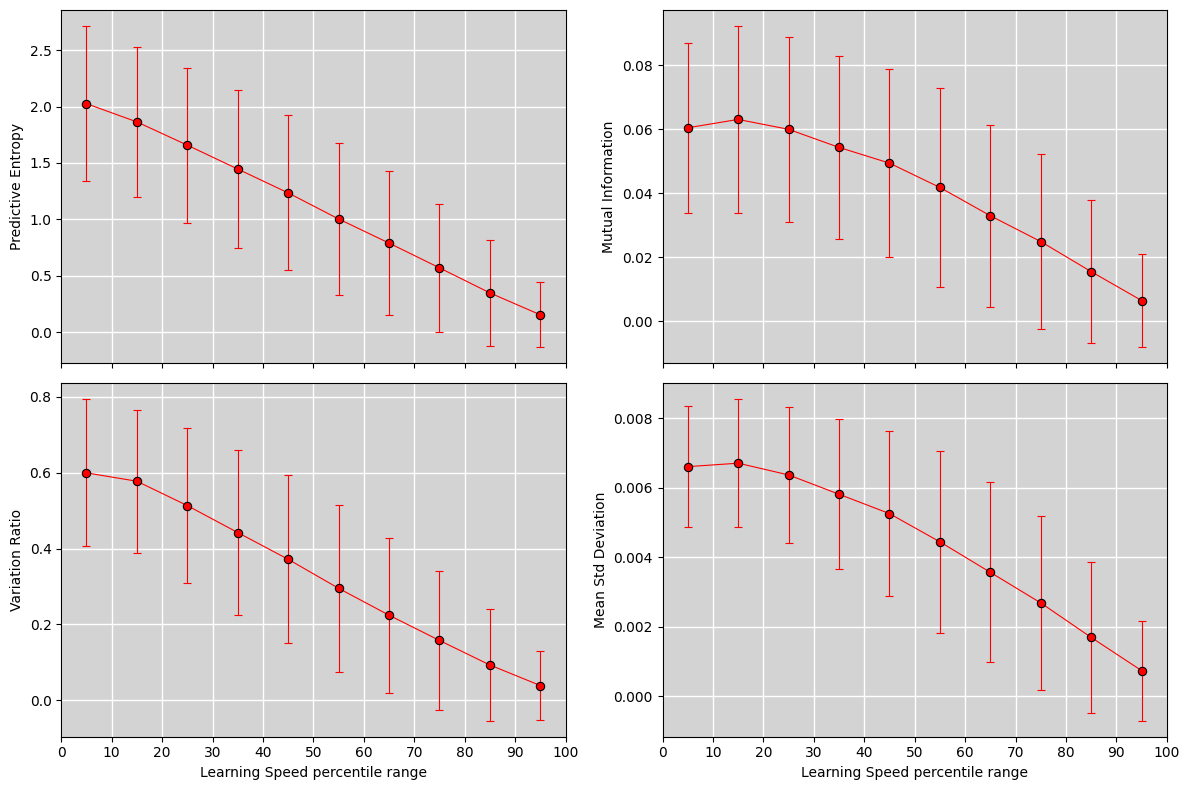

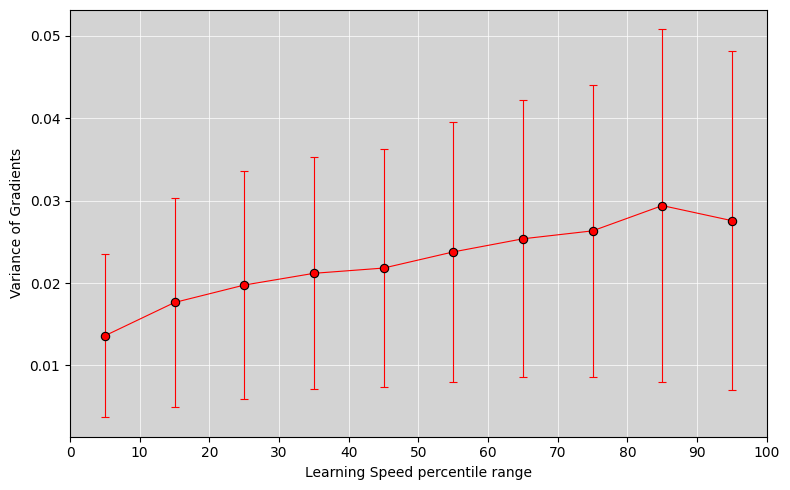

In [7]:
# Define bins for grouping Learning Speed
#learning_speed_bins = np.linspace(-0.025, 1.025, 22)
#df['Learning_Speed_Binned'] = pd.cut(df['Learning_Speed'], bins=learning_speed_bins)

percentiles = np.linspace(0, 100, 11)  # Define bins: 0-10%, 10-20%, ..., 90-100%
df['Percentile_Range'] = pd.qcut(df['Learning_Speed'], q=percentiles/100, labels=percentiles[:-1] + 5)

# Group by Learning Speed bins and calculate mean and standard deviation for each bin
grouped = df.groupby('Percentile_Range', observed=False).agg(
    Average_Learning_Speed=('Learning_Speed', 'mean'),
    Std_Learning_Speed=('Learning_Speed', 'std'),
    Predictive_Entropy_Mean=('Predictive_Entropy', 'mean'),
    Predictive_Entropy_Std=('Predictive_Entropy', 'std'),
    Mutual_Information_Mean=('Mutual_Information', 'mean'),
    Mutual_Information_Std=('Mutual_Information', 'std'),
    Variation_Ratio_Mean=('Variation_Ratio', 'mean'),
    Variation_Ratio_Std=('Variation_Ratio', 'std'),
    Mean_Std_Deviation_Mean=('Mean_Std_Deviation', 'mean'),
    Mean_Std_Deviation_Std=('Mean_Std_Deviation', 'std'),
    Variance_of_Gradients_Mean =('Variance_of_Gradients', 'mean'),
    Variance_of_Gradients_Std=('Variance_of_Gradients', 'std'),
).reset_index()

# Plot with error bars
variables_to_plot = [
    ('Predictive_Entropy_Mean', 'Predictive_Entropy_Std'),
    ('Mutual_Information_Mean', 'Mutual_Information_Std'),
    ('Variation_Ratio_Mean', 'Variation_Ratio_Std'),
    ('Mean_Std_Deviation_Mean', 'Mean_Std_Deviation_Std')
]

fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
for i, (y_mean, y_std) in enumerate(variables_to_plot):
    row, col = i // 2, i % 2
    ax = axs[row, col]
    ax.errorbar(
        grouped['Percentile_Range'],
        grouped[y_mean],
        yerr=grouped[y_std],
        fmt='o',
        color='red',
        markeredgecolor='black',
        markeredgewidth=0.8,
        linestyle='-',
        linewidth=0.8,
        capsize=3,
        elinewidth=0.8,
        capthick=0.8,
    )
    ax.set_facecolor('lightgray')
    ax.grid(True, linestyle='-', linewidth=1, color='white')

    if row == 1:
        ax.set_xlabel('Learning Speed percentile range')
    ax.set_ylabel(y_mean.replace('_Mean', '').replace('_', ' '))
    ax.set_xticks(np.arange(0, 101, 10))

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.errorbar(
        grouped['Percentile_Range'],
        grouped['Variance_of_Gradients_Mean'],
        yerr=grouped['Variance_of_Gradients_Std'],
        fmt='o',
        color='red',
        markeredgecolor='black',
        markeredgewidth=0.8,
        linestyle='-',
        linewidth=0.8,
        capsize=3,
        elinewidth=0.8,
        capthick=0.8,
    )
plt.xlabel('Learning Speed percentile range')
plt.ylabel("Variance of Gradients")
plt.xticks(np.arange(0, 101, 10))
plt.grid(True, which='major', linestyle='-', linewidth=0.5, color='white')
plt.gca().set_facecolor('lightgray')
plt.tight_layout()
plt.show();